## Inferenz für zwei Grundgesamtheitsmittelwerte unter Verwendung unabhängiger Stichproben; Standardabweichungen werden nicht als gleich angenommen
----------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t
from scipy import stats
import statsmodels.api as smi
import pylab

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


In den Fällen, in denen die Mittelwerte zweier Grundgesamtheiten getestet werden sollen und die Standardabweichungen zwischen den beiden Grundgesamtheiten unterschiedlich sind, wird der so genannte **nicht zusammengefasste $t$-Test** oder <a href="https://en.wikipedia.org/wiki/Welch's_t-test">Welch's $t$-Test</a> angewendet.

Der **nicht zusammengefasste $t$-Test** ist dem **zusammengefassten $t$-Test** sehr ähnlich, mit Ausnahme der Teststatistik $t$
und bei der Berechnung der Freiheitsgrade ($df$). Die Teststatistik nutzt nicht $s_z$, die zusammengefasste Standardabweichung, und wird geschrieben als

$$t =  \frac{(\bar x_1 - \bar x_2)}{ \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}\text{.}$$

Der Nenner der obigen Gleichung ist der Schätzer der Standardabweichung von $\bar x_1 - \bar x_2$ und gegeben durch

$$s_{\bar x_1 - \bar x_2} = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}\text{.}$$

Die Teststatistik $t$ folgt einer $t$-Verteilung und die Freiheitsgrade ($df$) sind gegeben durch

$$df=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_1^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1-1}+\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2-1}}\text{.}$$

Runden Sie die Freiheitsgrade auf die nächste ganze Zahl ab, wenn Sie Wahrscheinlichkeitstabellen verwenden.

Der **nicht zusammengefasste $t$-Test** ist robust gegenüber mäßigen Verstößen gegen die Normalverteilungsannahme, aber er ist weniger robust gegenüber Ausreißern (Weiss 2010).

### Intervall-Schätzung von $\mu_1 - \mu_2$

Das $100(1-\alpha)\%$-Konfidenzintervall für $\mu_1-\mu_2$ ist

$$(\bar x_1 - \bar x_2) \pm t^* \times  \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$$

wobei der Wert von $t$ aus der $t$-Verteilung für das gegebene Konfidenzniveau ermittelt wird. Die Freiheitsgrade ($df$) und die ergeben sich aus der obigen Gleichung.

### Der nicht zusammengefasste $t$-Test: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den nicht zusammengefassten $t$-Test in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [2]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, Name, Geschlecht, Alter, Größe, Gewicht, Religion, nc.score, Semester, Hauptfach, Nebenfach, score1, score2, online.tutorial, graduated, salary*.

Zur Veranschaulichung des nicht zusammengefassten $t$-Tests untersuchen wir das mittlere Jahresgehalt (in Euro) von Absolventinnen in Abhängigkeit von ihrem Studienfach. Die erste Grundgesamtheit besteht aus Studentinnen mit dem Hauptfach Politikwissenschaft und die zweite Grundgesamtheit aus Studentinnen mit dem Hauptfach Sozialwissenschaften. Wir wollen testen, ob es einen Unterschied im mittleren Gehalt dieser beiden Gruppen gibt.

### Vorbereitung der Daten

Wir beginnen mit der Datenaufbereitung.

-  Wir unterteilen den Datensatz anhand der Variablen `gender` und `graduated`.
-   Dann unterteilen wir die Teilmenge in Absolventen der Politikwissenschaften und der Sozialwissenschaften (Variable `major`).
-   Dann ziehen wir aus jeder Gruppe $50$ Studenten und extrahieren die Variable von Interesse, das mittlere Jahresgehalt (in Euro), das in der Spalte `salary` gespeichert ist. Wir ordnen diese beiden Vektoren den Variablen `PS` und `SS` zu.

In [3]:
female_graduates = students.loc[(students['graduated'] == 1) & (students['gender'] == 'Female')]
subset_PS = female_graduates.loc[female_graduates['major']== 'Political Science']
subset_SS = female_graduates.loc[female_graduates['major']== 'Social Sciences']

PS = subset_PS['salary'].sample(n=50, random_state=2)
SS = subset_SS['salary'].sample(n=50, random_state=2)

Außerdem überprüfen wir, ob die Daten normalverteilt sind, indem wir ein Q-Q-Diagramm erstellen. In Python können wir die Funktion `qqplot()` verwenden, um Q-Q-Plots zu erstellen.

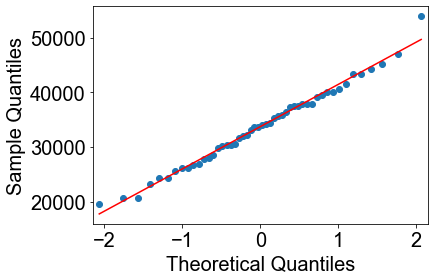

In [4]:
# Erzeuge Q-Q Plot
smi.qqplot(PS, line = "r")
pylab.show()

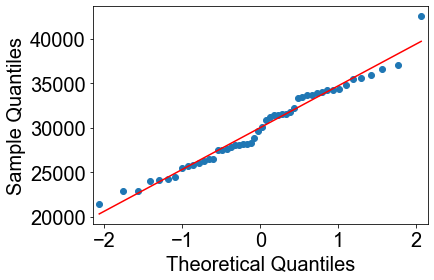

In [5]:
# Erzeuge Q-Q Plot
smi.qqplot(SS, line = "r")
pylab.show()

Wir sehen, dass die Daten beider Stichproben ungefähr auf einer Geraden liegen.

Gehen wir davon aus, dass die Daten des `students` Datensatzes eine gute Annäherung an die Grundgesamtheit darstellen. Dann können wir visuell überprüfen, ob sich die Standardabweichungen der beiden Grundgesamtheiten tatsächlich voneinander unterscheiden, indem wir ein Boxplot aufzeichnen.

{'whiskers': [<matplotlib.lines.Line2D at 0x182c5604790>,
 'caps': [<matplotlib.lines.Line2D at 0x182c5604d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x182c56044c0>],
 'medians': [<matplotlib.lines.Line2D at 0x182c56052d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x182c56055a0>],
 'means': []}

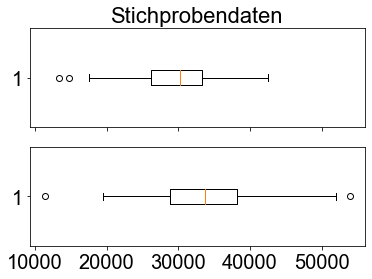

In [6]:
fig1, (ax1,ax2) = plt.subplots(2, sharex= 'all')

ax1.set_title('Stichprobendaten')
ax2.boxplot(subset_PS['salary'], vert = False)
ax1.boxplot(subset_SS['salary'], vert = False)

Auf der Grundlage des grafischen Auswertungsansatzes kommen wir zu dem Schluss, dass die Daten annähernd normalverteilt sind und dass die Standardabweichungen voneinander abweichen.

### Überprüfung der Hypothesen

Erinnern Sie sich an die Forschungsfrage. **Lassen die Daten den Schluss zu, dass sich das mittlere Jahresgehalt von Absolventinnen mit einem Hauptfach in Politikwissenschaft vom mittleren Jahresgehalt von Absolventinnen mit einem Hauptfach in Sozialwissenschaften unterscheidet?**

Um den nicht zusammengefassten $t$-Test durchzuführen, folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests.

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass das durchschnittliche Jahresgehalt von Absolventinnen mit dem Hauptfach Politikwissenschaft ($\mu_1$) gleich dem durchschnittlichen Jahresgehalt von Absolventinnen mit dem Hauptfach Sozialwissenschaften ($\mu_2$) ist.

$$H_0: \quad \mu_1 = \mu_2$$

**Alternative Hypothese**

$$H_A: \quad \mu_1 \ne \mu_2$$

Diese Formulierung führt zu einem zweiseitigen Hypothesentest.

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0.05$$

In [7]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Wir erinnern uns an die Gleichungen für die Teststatistik von oben.

In [8]:
# Compute the value of the test statistic
n1 = len(PS)
n2 = len(SS)
s1 = np.std(PS,ddof=1)
s2 = np.std(SS,ddof=1)
x1_bar = np.mean(PS)
x2_bar = np.mean(SS)

tw = (x1_bar-x2_bar)/(np.sqrt(s1**2/n1+s2**2/n2))
tw

3.0544555468902663

Der numerische Wert der Teststatistik ist $3,05445554689$.

Um den $p$-Wert zu berechnen, wenden wir die Funktion `t.cdf()` an. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet.

$$df=\frac{\left(\frac{s_1^2}{n_1}+\frac{s_1^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1-1}+\frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2-1}}\text{,}$$

In [9]:
# Compute df
df_numerator = (s1**2/n1 + s2**2/n2)**2
df_denominator = (s1**2/n1)**2/(n1-1) + (s2**2/n2)**2/(n2-1)
df = df_numerator/df_denominator 
df

81.31177848416957

In [10]:
# Compute the p-value
# recall we are applying a two-sided test
upper = 1-t.cdf(abs(tw), df = df)
lower = t.cdf(-abs(tw), df = df)
p = upper + lower
p

0.00304798706344924

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [11]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $5 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=0,003047987$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass sich das durchschnittliche Jahresgehalt von Absolventinnen der Politikwissenschaft vom durchschnittlichen Jahresgehalt von Absolventinnen der Sozialwissenschaften unterscheidet.

### Hypothesentests in Python

Wir haben gerade einen nicht zusammengefassten $t$-Test in Python manuell durchgeführt. Jetzt nutzen wir die volle Leistung  von Python, um das gleiche Ergebnis wie oben mit nur einer Zeile Code zu erhalten!

Um einen nicht zusammengefassten $t$-Test in Python durchzuführen, verwenden wir die Funktion `ttest_ind()`. Wir geben zwei Vektoren als Dateneingabe an und setzen `equal_var = False`, um explizit anzugeben, dass wir die nicht zusammengefasste Version des $t$-Tests anwenden. Das Argument `alternative` muss nicht gesetzt werden, da der Standardwert unserer Alternativhypothese entspricht $H_A: \; \mu_1 \ne \mu_2$

In [12]:
stats.ttest_ind(PS, SS, equal_var=False)

Ttest_indResult(statistic=3.0544555468902663, pvalue=0.0030479870634492604)

Stark! Vergleichen Sie die Ausgabe der Funktion `ttest_ind()` mit unserem Ergebnis von oben. Sie stimmen perfekt überein! Auch hier können wir schlussfolgern, dass die Daten bei einem Signifikanzniveau von $5 \%$ einen sehr starken Hinweis darauf liefern, dass sich das durchschnittliche Jahresgehalt von Absolventinnen der Politikwissenschaft vom durchschnittlichen Jahresgehalt von Absolventinnen der Sozialwissenschaften unterscheidet.